# Data Exploration
Taking a look at the data.

The data can be found here: https://www.kaggle.com/yasserh/breast-cancer-dataset

Documentation can be found here: https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)

You can also find the github repo here: https://github.com/brianl2/BrCancer_LHL_final
Note: 
Attribute information

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

   a) radius (mean of distances from center to points on the perimeter)
   b) texture (standard deviation of gray-scale values)
   c) perimeter
   d) area
   e) smoothness (local variation in radius lengths)
   f) compactness (perimeter^2 / area - 1.0)
   g) concavity (severity of concave portions of the contour)
   h) concave points (number of concave portions of the contour)
   i) symmetry 
   j) fractal dimension ("coastline approximation" - 1)

The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  

For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

Worst is the mean of the largest values 

In [1]:
# importing modules
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read dataframe
df = pd.read_csv('data/breast-cancer.csv')

In [3]:
# print out dataframe after making a copy
brca = df.copy()
brca.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# Shape isn't too large, 569 rows and 30 features (1 target & 1 ID) 
brca.shape

(569, 32)

In [171]:
# There is only 10 actual dimensional measurements. 
brca.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [168]:
# Everything is a float, and the diagnosis is an object. 
brca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Lets do some Exploratory data analysis
1. How many cancerous tumors are there compared to benign?
2. What are the statistics?
3. Correlation between features and target?

Benign : 62.741652021089635%
Malignant : 37.258347978910365%


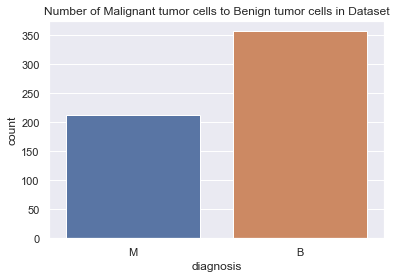

In [97]:
# plotting to see what the distribution is like (Not super imbalanced)
sns.set_theme(style="darkgrid")

df1 = brca['diagnosis'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
    
ax = sns.countplot(x=brca['diagnosis'], data=df1).set_title('Number of Malignant tumor cells to Benign tumor cells in Dataset')
    
print(f'Benign : {df1.percent[0]}%')
print(f'Malignant : {df1.percent[1]}%')

In [11]:
#Replacing M and B in target variable to numbers (Object to float)
brca['diagnosis'] = brca['diagnosis'].replace({'M': 0 , "B":1}) 

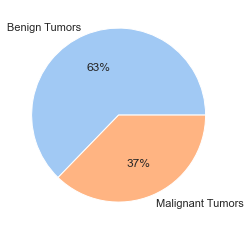

In [91]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
data = brca['diagnosis'].value_counts()
labels =['Benign Tumors','Malignant Tumors']
#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

Data Looks a bit imbalanced. May try with & without resampling techniques. 

In [76]:
# Taking a look at the statistics
brca.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [94]:
# Doesn't seem to be any nulls in the dataset.
brca.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [95]:
brca.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


How large is an average tumor (radius & Area)
Are malignant tumors larger than benign ones? and by how much?

In [13]:
def size_diff(x):
    'Prints out the difference between M and B tumors for any feature given'
    M = brca[brca['diagnosis'] == 0][str(x)].mean()
    B = brca[brca['diagnosis'] == 1][str(x)].mean()
    print(f'Malignant average {x} is: {M}')
    print(f'Benign average {x} is: {B}')
    if M >= B: 
        print(f'on average, Malignant tumor {x} is {(M-B) / B * 100}% bigger.')
    if B > M:
        print(f'on average, benign tumor {x} is {(B-M) / M * 100}% bigger.')
        

In [14]:
# Checking radius size
size_diff('radius_mean')

Malignant average radius_mean is: 17.46283018867925
Benign average radius_mean is: 12.14652380952381
on average, Malignant tumor radius_mean is 43.76813039288693% bigger.


In [15]:
# checking the tumors areas
size_diff('area_mean')

Malignant average area_mean is: 978.3764150943397
Benign average area_mean is: 462.79019607843145
on average, Malignant tumor area_mean is 111.40819822564461% bigger.


In [16]:
# Lets check the Largest tumor's averages
size_diff('area_worst')

Malignant average area_worst is: 1422.286320754717
Benign average area_worst is: 558.8994397759104
on average, Malignant tumor area_worst is 154.47982580282775% bigger.


We can see that the malignant tumors are way larger

Distribution & Correlation

In [70]:
def plot_comparisons(column, x_label):
    '''plots a density graph, enter in feature of interest, and the label of the X axis.'''
    X = sns.displot(brca, x=str(column), col = 'diagnosis', kde=True).set(xlabel=str(x_label), ylabel='Density').fig.suptitle('Density plot for tumors');
    return X;


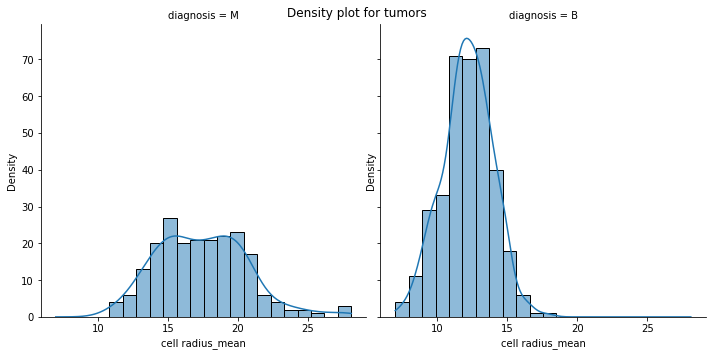

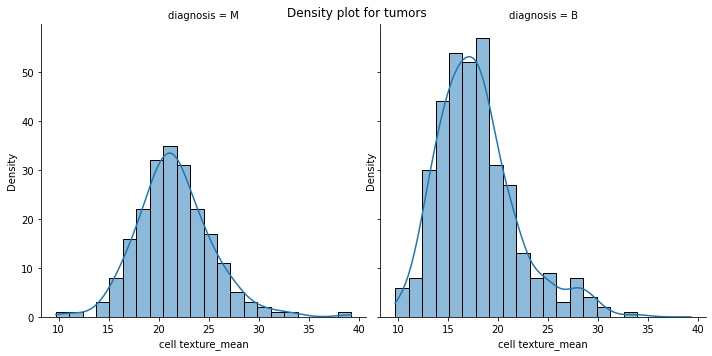

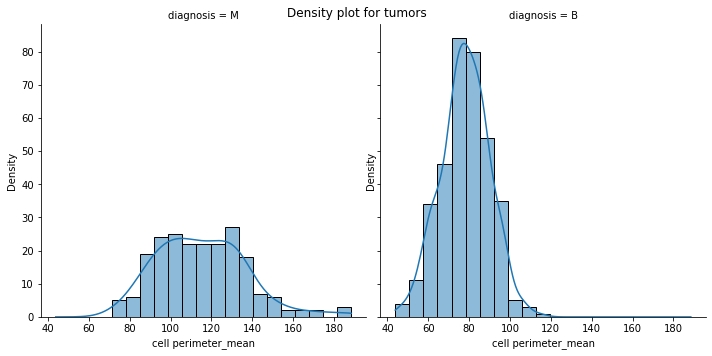

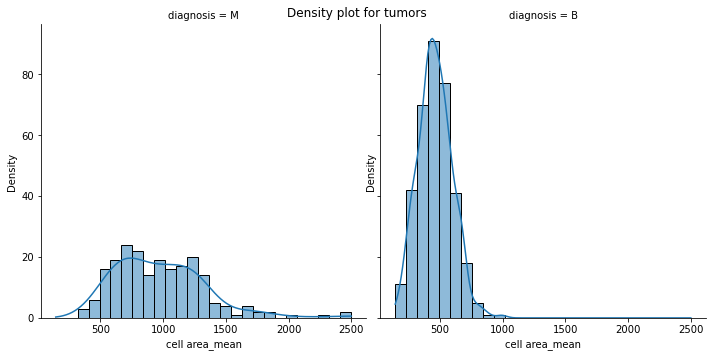

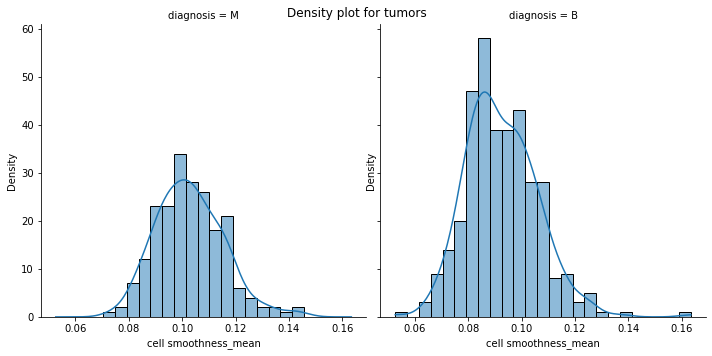

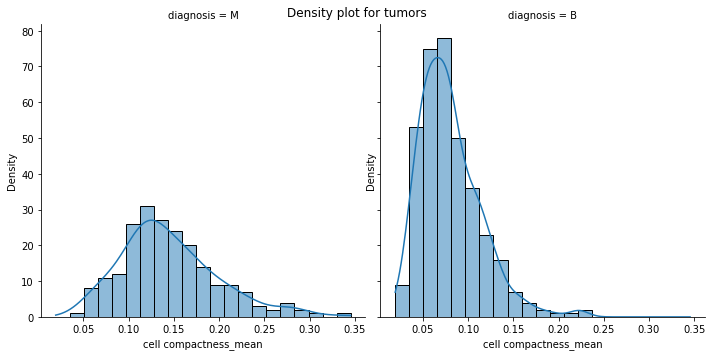

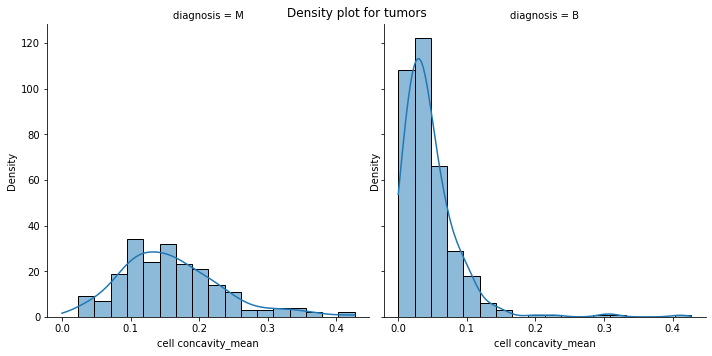

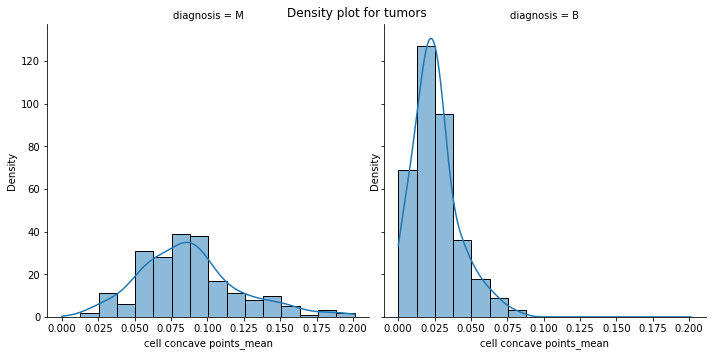

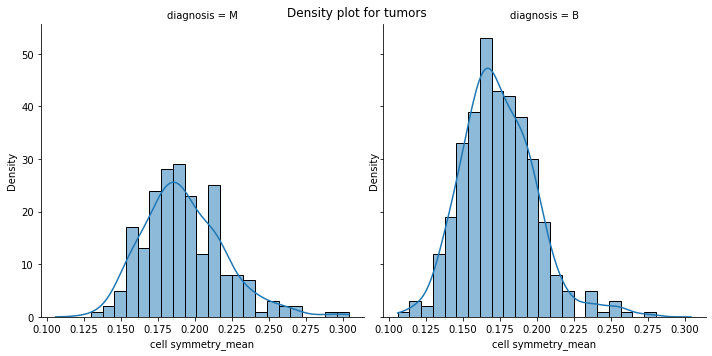

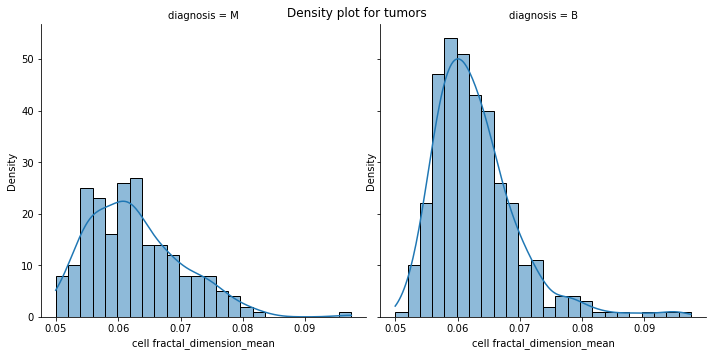

In [17]:
# plotting distribution of the 10 features means
features = [i for i in brca.columns.values if i not in ['diagnosis','id']]
# remember, that 0 means malignant.
for i in features[0:10]:
    plot_comparisons(i, f'cell {i}')

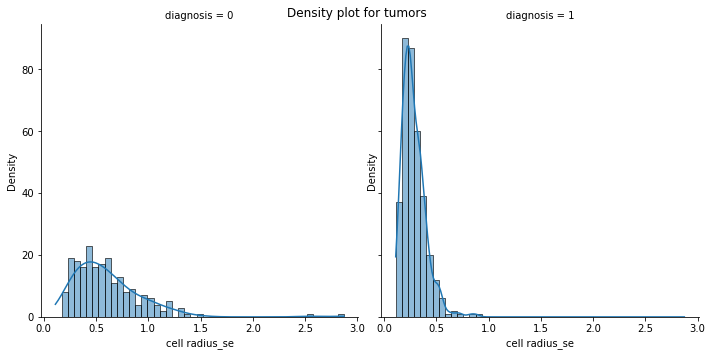

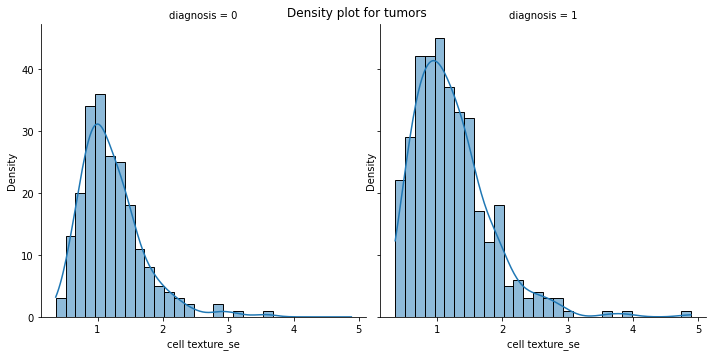

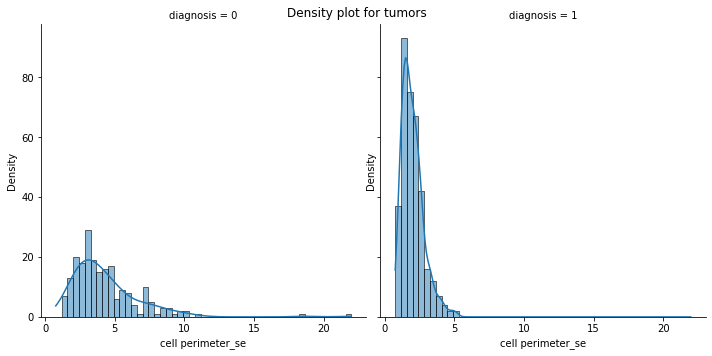

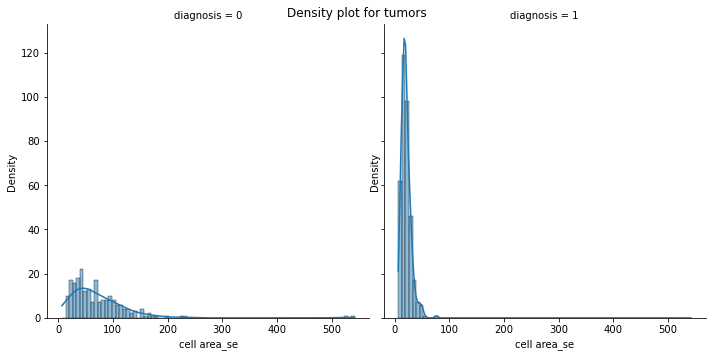

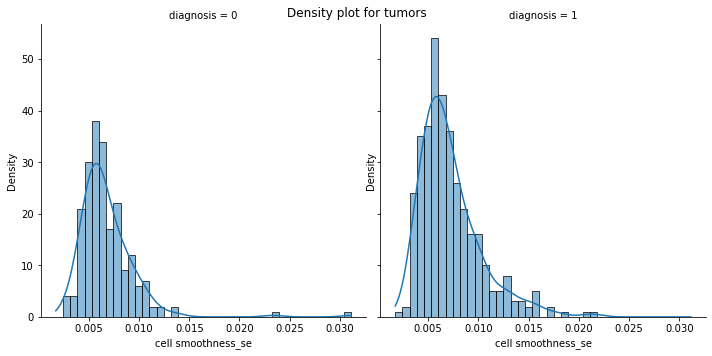

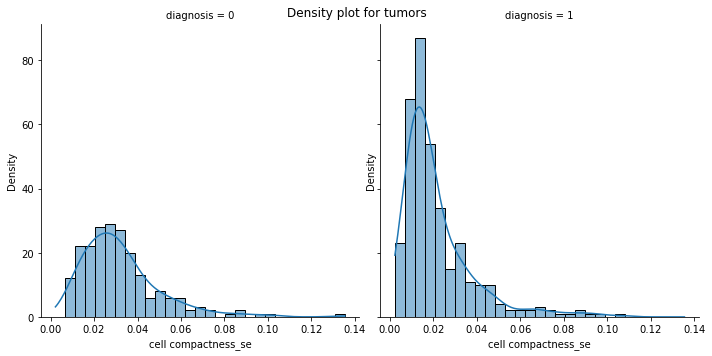

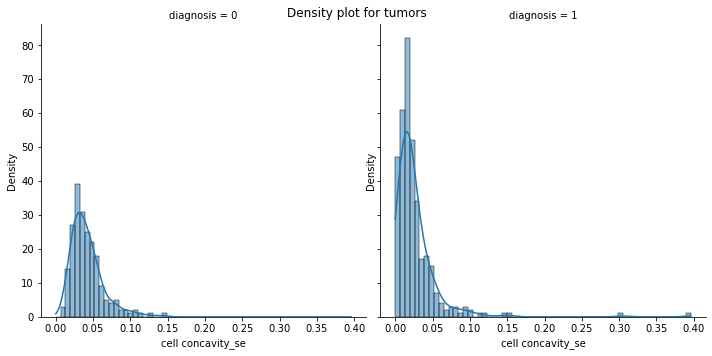

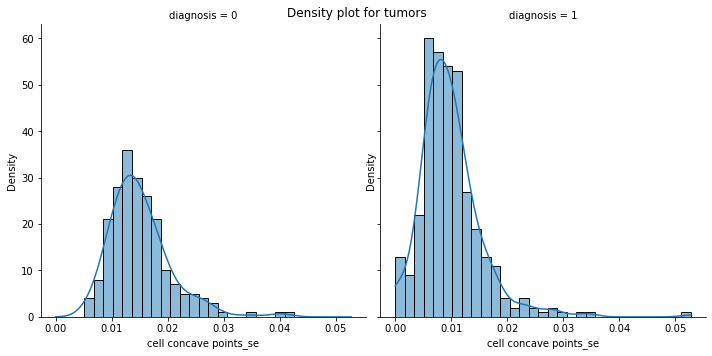

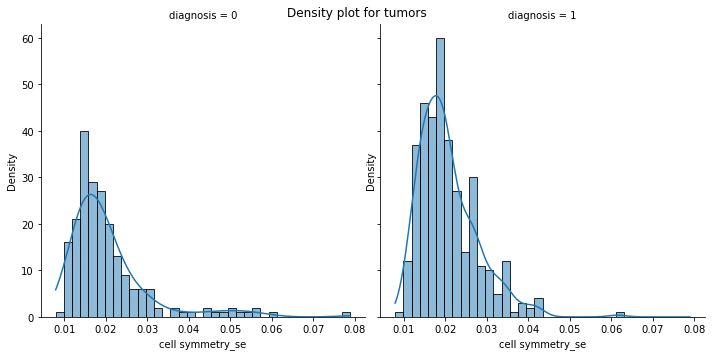

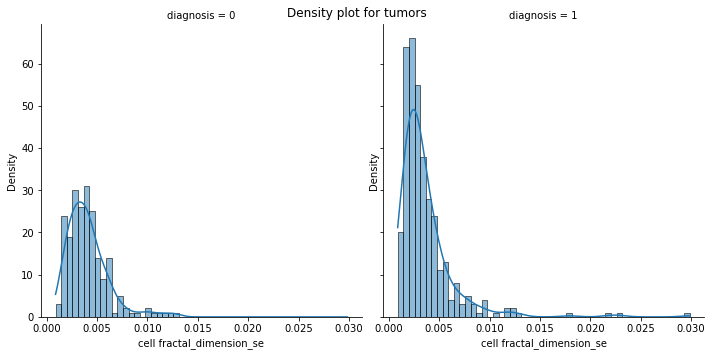

In [57]:
# Plotting density for the Standard error 
for i in features[10:20]:
    plot_comparisons(i, f'cell {i}')

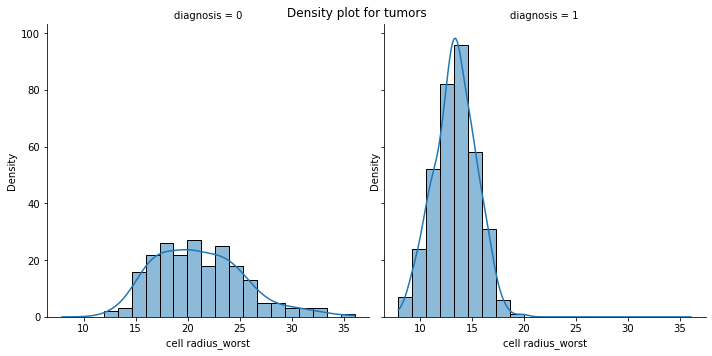

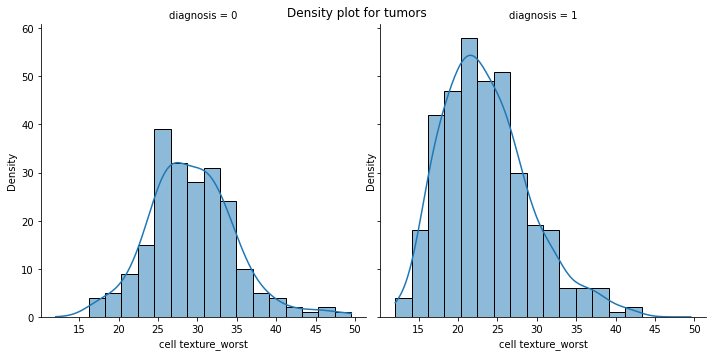

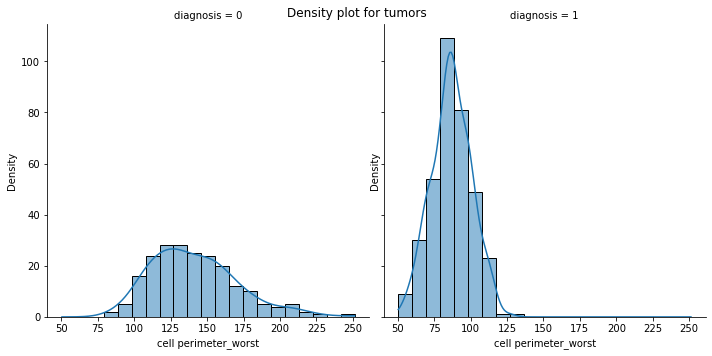

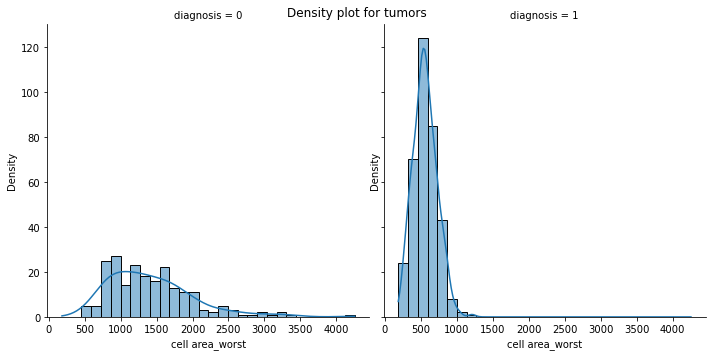

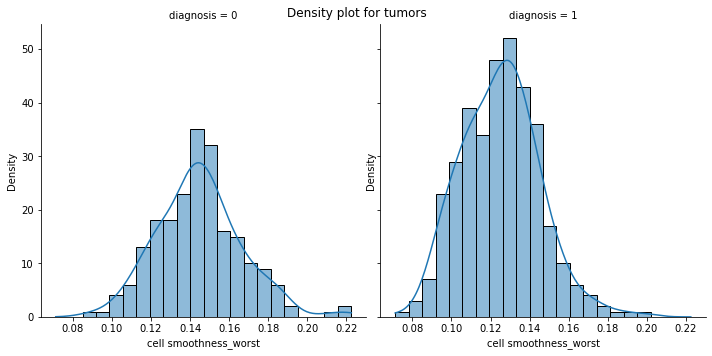

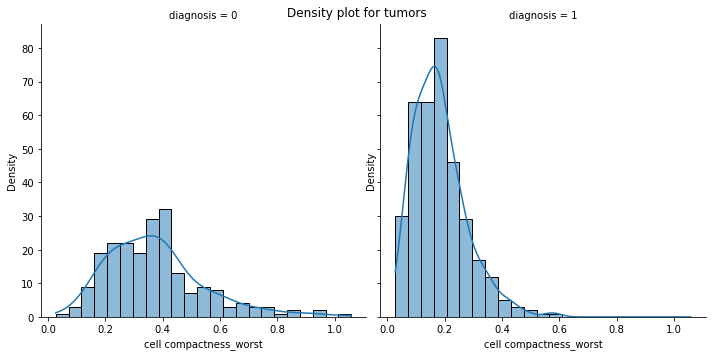

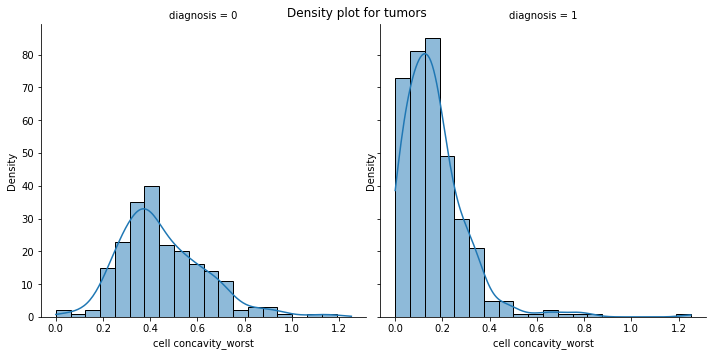

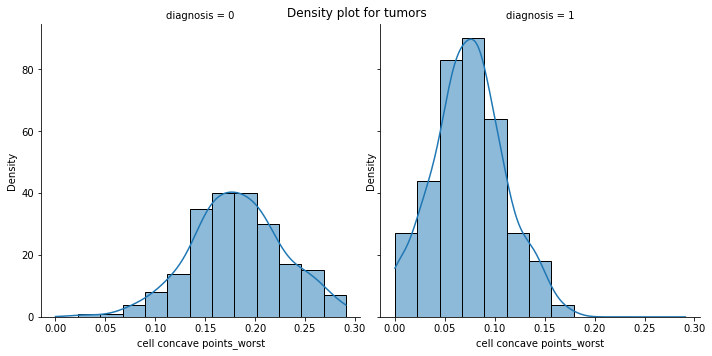

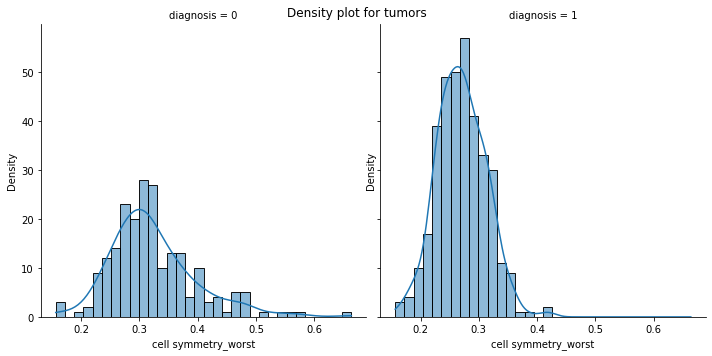

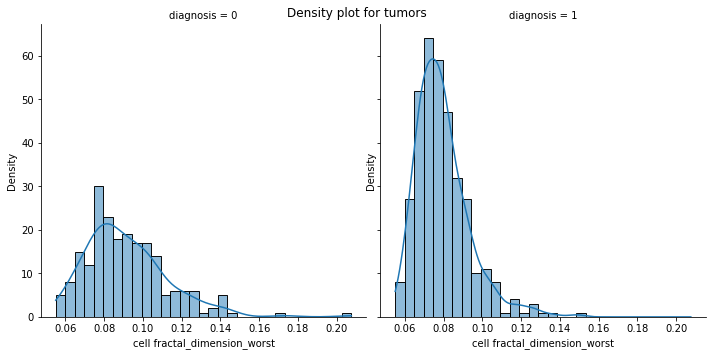

In [58]:
# Plotting for the worst / largest means 
for i in features[20:30]:
    plot_comparisons(i, f'cell {i}')

### Overall:
the data is pretty normal. Both Malignant and Benign cells have some outliers that are really large, which seem to be abnormal (fractal dimension_mean)
There are some outliers that we could try to remove or keep (Feature Engineering)

In [5]:
brca2 = brca.drop(columns = 'id')

In [76]:
brca2.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,-0.596534,-0.696360,-0.776614,-0.330499,...,-0.776454,-0.456903,-0.782914,-0.733825,-0.421465,-0.590998,-0.659610,-0.793566,-0.416294,-0.323872
radius_mean,-0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,-0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,-0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,-0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,-0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,-0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,-0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


<AxesSubplot:>

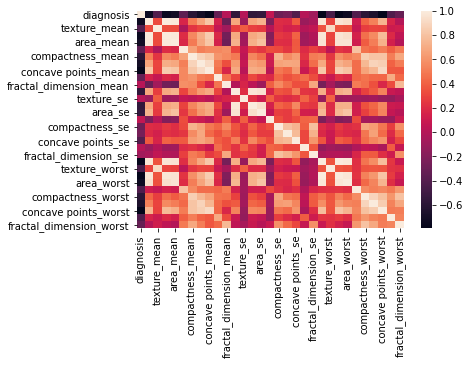

In [78]:
sns.heatmap(brca2.corr())

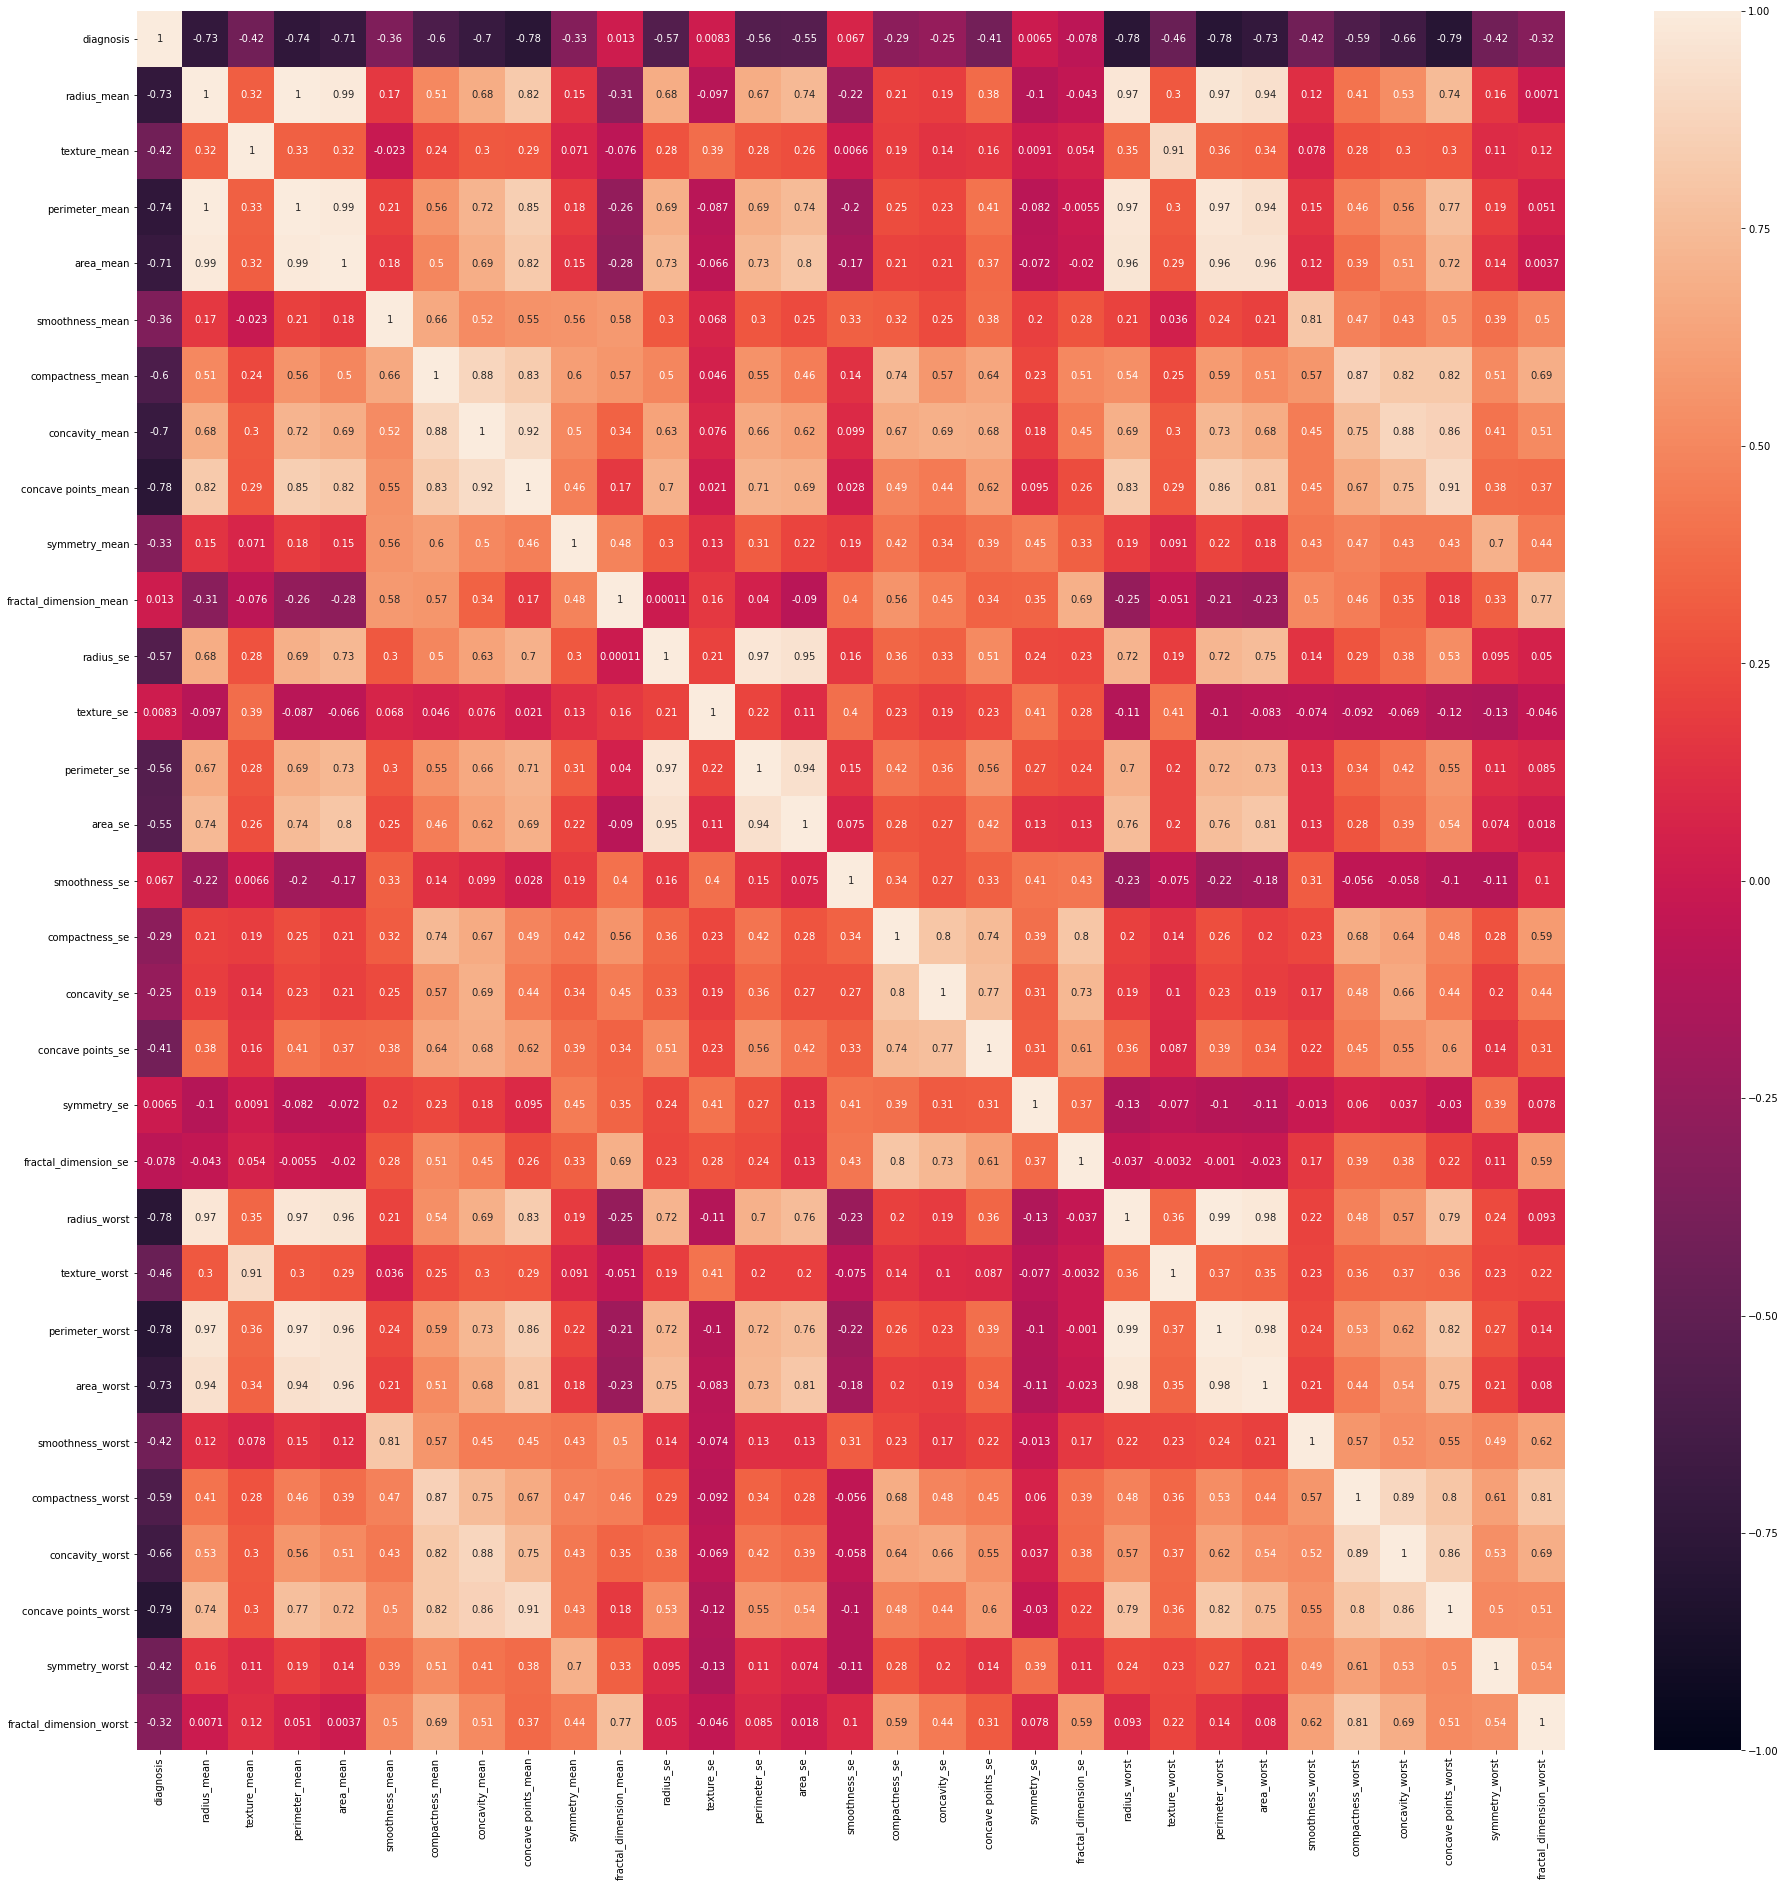

In [79]:
plt.figure(figsize=(32, 32))

heatmap = sns.heatmap(brca2.corr(), vmin=-1, vmax=1, annot=True)

There is a a lot of colinearity (Multicolinearity). If running a regression model, It may be an issue
- Lets pick only columns that are less than 75% correlated. 

In [1]:
def correlation(dataset, threshold):
    '''Input the dataset and the threshold of correlation to isolate which columns are greater than that threshold.'''
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [9]:
# Lets see how many there are that are above 0.75
correlated = correlation(brca2, 0.75)
len(correlated)

18

In [8]:
# Names of columns to remove
correlated

{'area_mean',
 'area_se',
 'area_worst',
 'compactness_worst',
 'concave points_mean',
 'concave points_se',
 'concave points_worst',
 'concavity_mean',
 'concavity_se',
 'concavity_worst',
 'fractal_dimension_se',
 'fractal_dimension_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_worst',
 'smoothness_worst',
 'texture_worst'}